# Purpose of this model
This model uses data from a quiz done in the Bulgarian IT community. The purpose is to be able to predict salary based on years of experience in the current tech stack and years of experience overall.

<b>To use just write 'regression.predict([[\<current_experience\>, \<overall_experience\>]])'</b>

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
salaries = pd.read_csv("salaryrangesbg.csv")
salaries

,salary,curexp,exp
0,5800,2.0,6.0
1,550,10.0,0.0
2,9600,5.0,8.0
3,9000,4.0,7.0
4,5000,2.0,7.0
...,...,...,...
167,2000,1.0,10.0
168,7000,1.0,9.0
169,16000,2.0,8.0
170,6000,5.0,10.0


In [3]:
salaries_copy = salaries.copy()

# We filter the faulty rows (current experience cannot be higher than overall experience, salary cannot be 0)
salaries_copy = salaries_copy[(salaries_copy.curexp <= salaries_copy.exp) & (salaries_copy.salary != 0)]
salaries_copy

,salary,curexp,exp
0,5800,2.0,6.0
2,9600,5.0,8.0
3,9000,4.0,7.0
4,5000,2.0,7.0
5,10000,2.0,8.0
...,...,...,...
167,2000,1.0,10.0
168,7000,1.0,9.0
169,16000,2.0,8.0
170,6000,5.0,10.0


In [4]:
# We fill NaN column values
salary_mean = salaries_copy.salary.mean()
curexp_mean = salaries_copy.curexp.mean()
exp_mean = salaries_copy.exp.mean()

salaries_copy.salary = salaries_copy.salary.fillna(salary_mean)
salaries_copy.curexp = salaries_copy.curexp.fillna(curexp_mean)
salaries_copy.exp = salaries_copy.exp.fillna(exp_mean)

salaries_copy = salaries_copy[(salaries_copy.curexp <= salaries_copy.exp)]
salaries_copy

,salary,curexp,exp
0,5800,2.0,6.0
2,9600,5.0,8.0
3,9000,4.0,7.0
4,5000,2.0,7.0
5,10000,2.0,8.0
...,...,...,...
167,2000,1.0,10.0
168,7000,1.0,9.0
169,16000,2.0,8.0
170,6000,5.0,10.0


In [5]:
salary_mean

6337.7177914110425

In [6]:
curexp_mean

2.8625766871165643

In [7]:
exp_mean

8.40122699386503

In [8]:
# IQR Outliers removal happens here
# SALARY
Q1 = np.percentile(salaries_copy.salary, 25,
                   method = 'midpoint')
 
Q3 = np.percentile(salaries_copy.salary, 75,
                   method = 'midpoint')
IQR = Q3 - Q1

upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

salaries_copy = salaries_copy[(salaries_copy.salary <= upper_boundary) & (salaries_copy.salary >= lower_boundary)]

# EXPERIENCE
Q1 = np.percentile(salaries_copy.exp, 25,
                   method = 'midpoint')
 
Q3 = np.percentile(salaries_copy.exp, 75,
                   method = 'midpoint')
IQR = Q3 - Q1

upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

salaries_copy = salaries_copy[(salaries_copy.exp <= upper_boundary) & (salaries_copy.exp >= lower_boundary)]


# CURRENT EXPERIENCE
Q1 = np.percentile(salaries_copy.curexp, 25,
                   method = 'midpoint')
 
Q3 = np.percentile(salaries_copy.curexp, 75,
                   method = 'midpoint')
IQR = Q3 - Q1

upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR

salaries_copy = salaries_copy[(salaries_copy.curexp <= upper_boundary) & (salaries_copy.curexp >= lower_boundary)]
salaries_copy

,salary,curexp,exp
0,5800,2.0,6.0
2,9600,5.0,8.0
3,9000,4.0,7.0
4,5000,2.0,7.0
5,10000,2.0,8.0
...,...,...,...
166,2100,4.0,16.0
167,2000,1.0,10.0
168,7000,1.0,9.0
170,6000,5.0,10.0


In [9]:
# Plotting happens here
import matplotlib.pyplot as plt

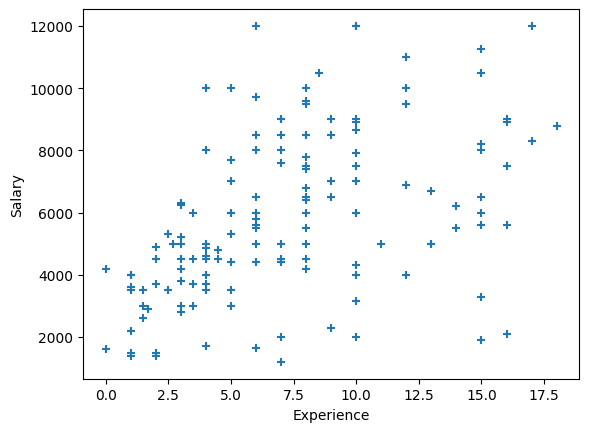

In [10]:
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.scatter(salaries_copy.exp, salaries_copy.salary, marker = '+')

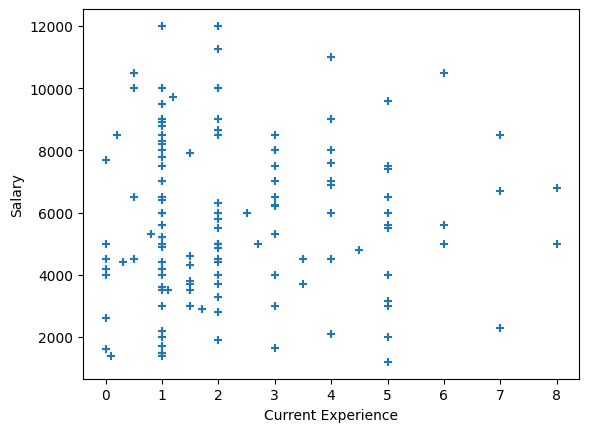

In [11]:
plt.xlabel('Current Experience')
plt.ylabel('Salary')

plt.scatter(salaries_copy.curexp, salaries_copy.salary, marker = '+')

In [12]:
# The model creation happens here
regression = linear_model.LinearRegression()
regression.fit(salaries_copy[['curexp', 'exp']].values, salaries_copy.salary.values)

LinearRegression()

In [13]:
regression.coef_

array([-176.02590678,  293.41399362])

In [14]:
regression.intercept_

4134.939188717749

In [15]:
regression.predict([[4, 4]])

array([4604.49153604])

In [16]:
regression.score(salaries_copy[['curexp', 'exp']].values, salaries_copy.salary.values)

0.22630847321920267

In [17]:
# Exporting happens here
import pickle
with open('salaries_model', 'wb') as file:
    pickle.dump(regression, file)